In [74]:
#-----------------------------------------------------------------------#
#
# 
#
# Copyright (C) 2021 Andrés García-Serra Romero <alu0101451923@ull.edu.es>
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

#IMPORTING LIBRARIES:
import os
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h,c,k
from mv_name import m_v_name

#PLOT-FORMAT:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

#DIRECTORIES:
datadir = 'tables/'
figdir = 'figures/'

In [7]:
# 0. Identify column variables:
files = os.listdir(datadir)                           # Read all text files in the folder
with open(datadir+files[0], "r") as file:             # Read the first line of a .dat table
    first_line = file.readline()
    for last_line in file:
        pass

with open(datadir+files[0], "r") as file:             # Read the first line of a .dat table
    first_line = file.readline()
    for last_line in file:
        pass
    
first_line = first_line.split()                       # Make the string line a string array
for i in range(0,len(first_line)-1):                  # Print the column number and variable
    print((i+1),first_line[i])

1 line
2 time
3 mass
4 lg(L)
5 lg(Teff)
6 1H_surf
7 4He_surf
8 12C_surf
9 13C_surf
10 14N_surf
11 16O_surf
12 17O_surf
13 18O_surf
14 20Ne_surf
15 22Ne_surf
16 26Al_surf
17 Mcc/Mt
18 lg(Teff)
19 lg(Md)
20 lg(rhoc)
21 lg(Tc)
22 1H_cen
23 4He_cen
24 12C_cen
25 13C_cen
26 14N_cen
27 16O_cen
28 17O_cen
29 18O_cen
30 20Ne_cen
31 22Ne_cen
32 26Al_cen
33 Omeg_surf
34 Omeg_cen
35 Rp/Req
36 Md/Md(0)
37 v_crit1
38 v_crit2
39 v_equa
40 Om/Om_cr
41 Gamma_Ed
42 lg(Mdot_mech)


M=5Msol , Vcrit= 4 , Tms= 0.11007968488366901 Gyr
M=5Msol , Vcrit= 0 , Tms= 0.08899592245373861 Gyr
M=9Msol , Vcrit= 4 , Tms= 0.0314590489194745 Gyr
M=9Msol , Vcrit= 0 , Tms= 0.026508595857373304 Gyr


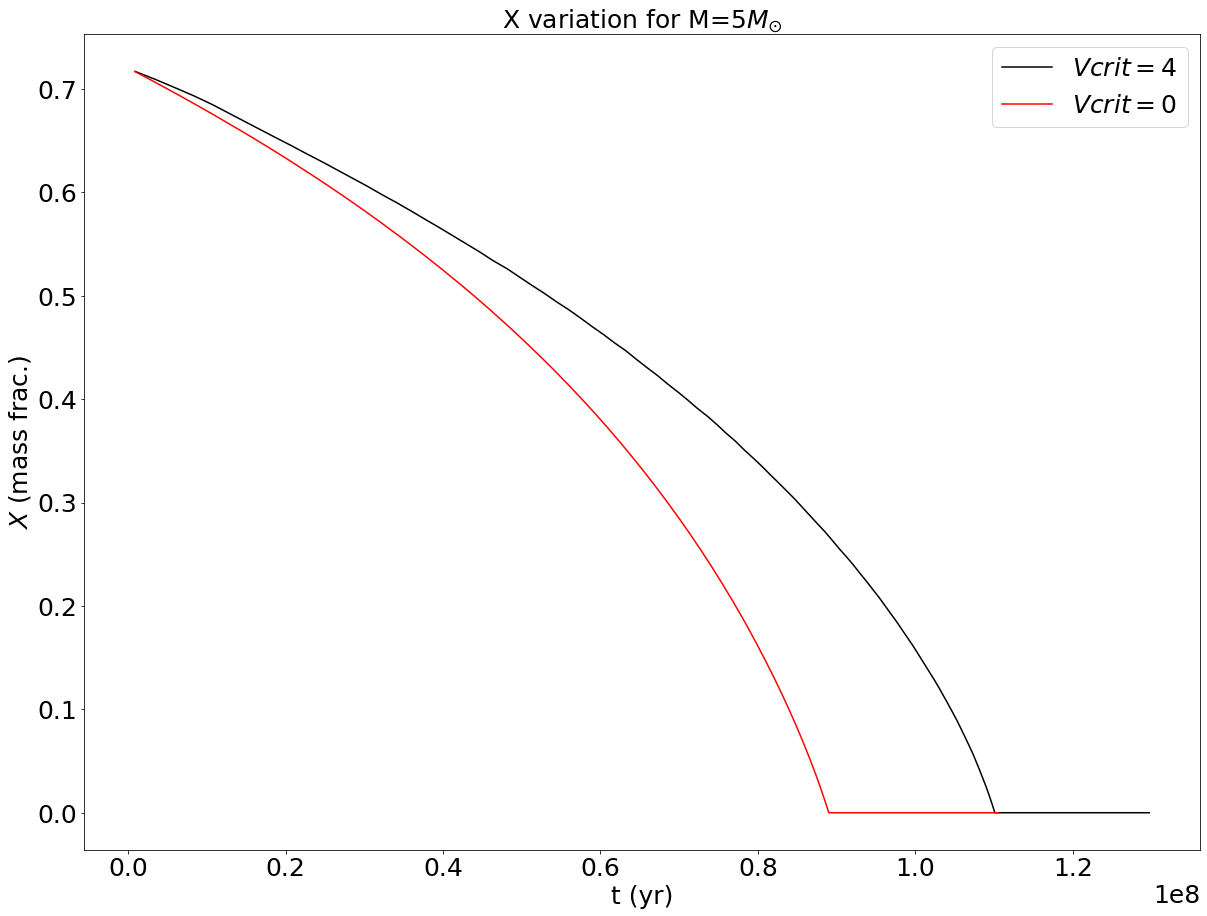

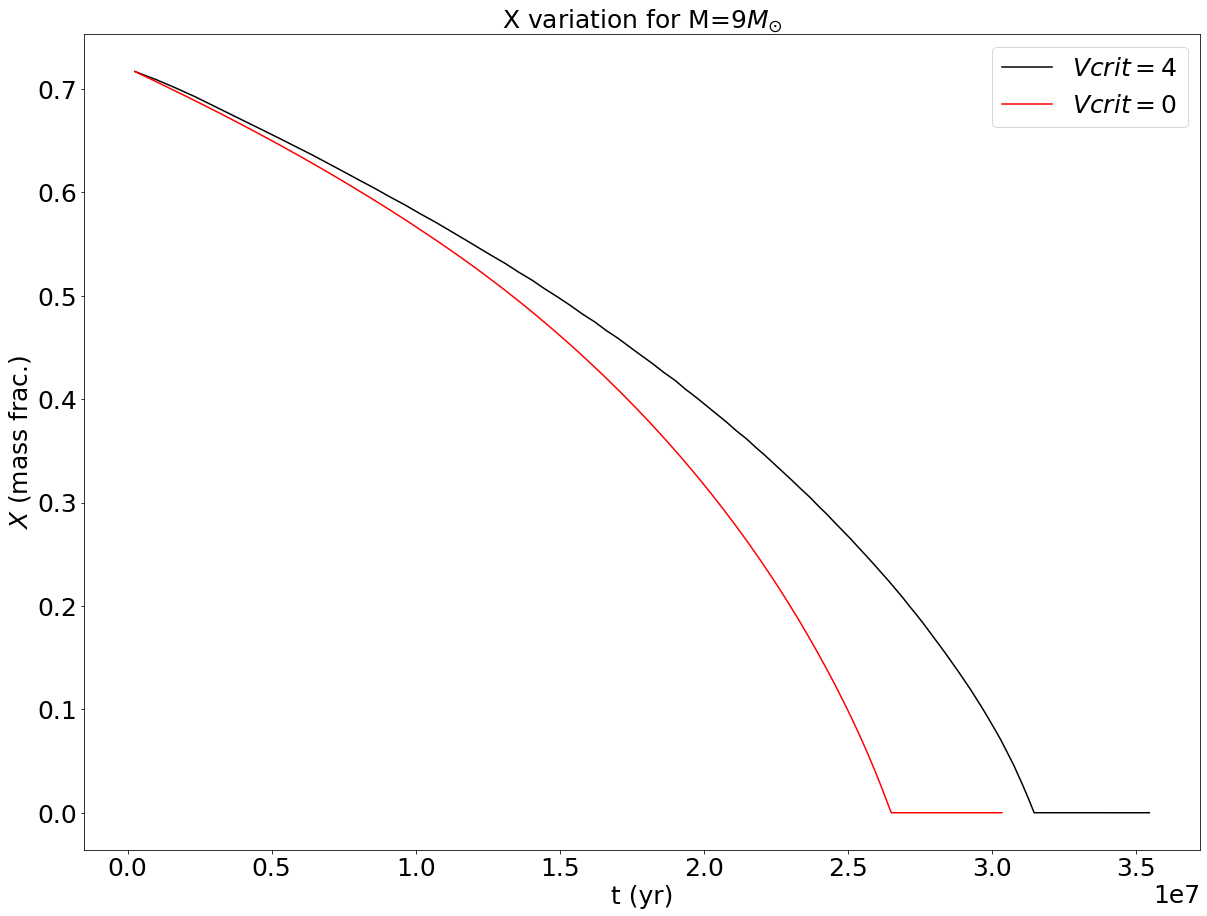

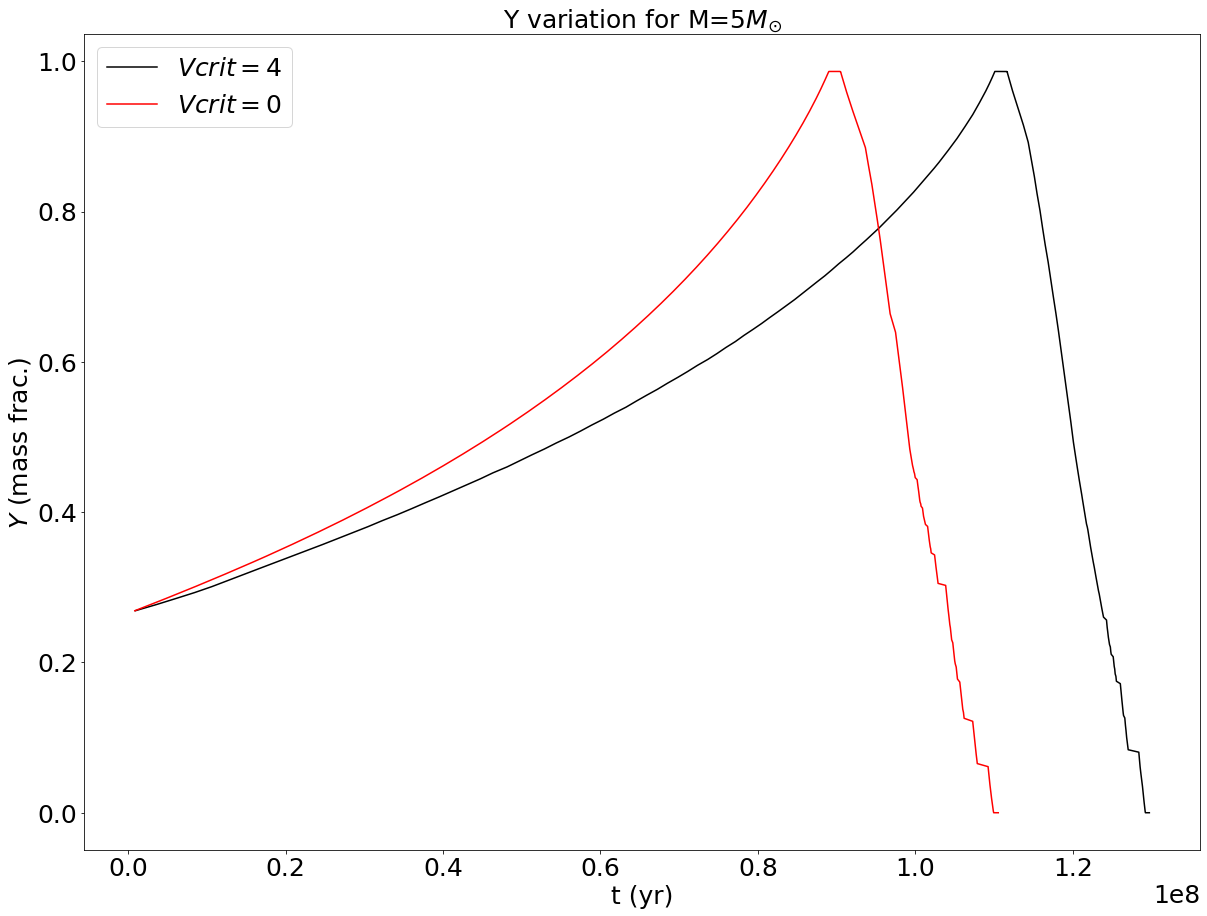

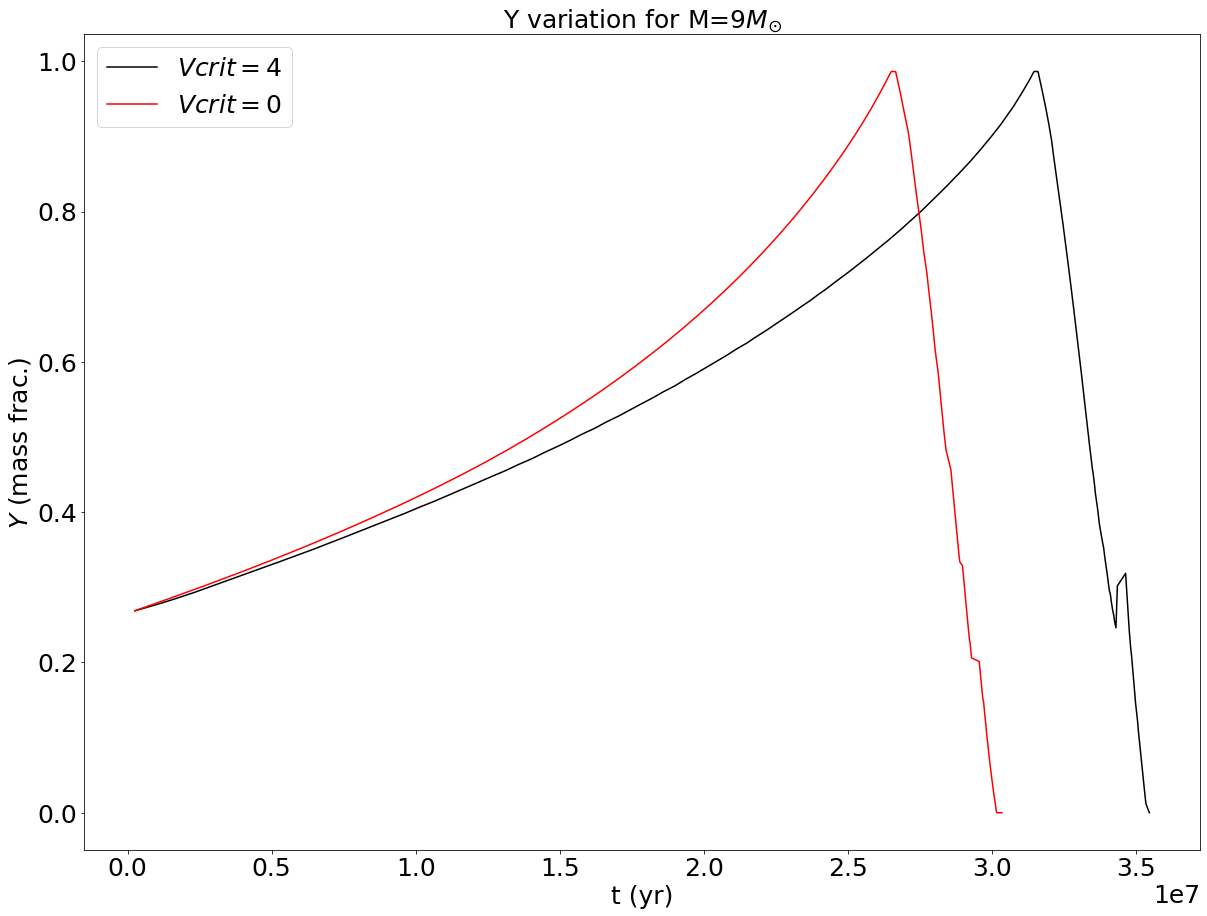

In [75]:
# 1. Abundance in time of H and He in 5 and 9 solar mass stars
fivemsol = []
ninemsol = []
plotlines = ['k-','r-','k--','r--']
for name in files:                                    # Create a list of files containing models
    if name[:4] == "M005":                            # with 5 and 9 solar masses
        fivemsol.append(name)
    if name[:4] == "M009":
        ninemsol.append(name)

# H Abundance
    # 5 solar masses
plt.figure(figsize=(20,15))
for i in range(0,len(fivemsol)):
    data = np.loadtxt(datadir+fivemsol[i],skiprows=3)
    time = data[:,1]
    Xcen = data[:,21]
    Xcenlist = Xcen.flatten().tolist()
    print('M=5Msol , Vcrit=',fivemsol[i][-5],', Tms=',(time[Minpos]*1e-9),'Gyr')
    plt.plot(time,Xcen,plotlines[i],label=r'$Vcrit=$'+fivemsol[i][-5])
plt.legend()
plt.title(r'X variation for M=5$M_{\odot}$')
plt.xlabel('t (yr)')
plt.ylabel(r'$X$'+' (mass frac.)')
plt.savefig(figdir+'5solmassH.png',dpi=300)

    # 9 solar masses
plt.figure(figsize=(20,15))
for i in range(0,len(ninemsol)):
    data = np.loadtxt(datadir+ninemsol[i],skiprows=3)
    time = data[:,1]
    Xcen = data[:,21]
    Xcenlist = Xcen.flatten().tolist()
    x = np.array(Xcenlist)
    Minpos = np.where(x < 0.001)[0][0]
    print('M=9Msol , Vcrit=',fivemsol[i][-5],', Tms=',(time[Minpos]*1e-9),'Gyr')
    plt.plot(time,Xcen,plotlines[i],label=r'$Vcrit=$'+ninemsol[i][-5])
plt.legend()
plt.title(r'X variation for M=9$M_{\odot}$')
plt.xlabel('t (yr)')
plt.ylabel(r'$X$'+' (mass frac.)')
plt.savefig(figdir+'9solmassH.png',dpi=300)



# He Abundance
    # 5 solar masses
plt.figure(figsize=(20,15))
for i in range(0,len(fivemsol)):
    data = np.loadtxt(datadir+fivemsol[i],skiprows=3)
    time = data[:,1]
    Ycen = data[:,22]
    plt.plot(time,Ycen,plotlines[i],label=r'$Vcrit=$'+fivemsol[i][-5])
plt.legend()
plt.title(r'Y variation for M=5$M_{\odot}$')
plt.xlabel('t (yr)')
plt.ylabel(r'$Y$'+' (mass frac.)')
plt.savefig(figdir+'5solmassHe.png',dpi=300)

    # 9 solar masses
plt.figure(figsize=(20,15))
for i in range(0,len(ninemsol)):
    data = np.loadtxt(datadir+ninemsol[i],skiprows=3)
    time = data[:,1]
    Ycen = data[:,22]
    plt.plot(time,Ycen,plotlines[i],label=r'$Vcrit=$'+ninemsol[i][-5])
plt.legend()
plt.title(r'Y variation for M=9$M_{\odot}$')
plt.xlabel('t (yr)')
plt.ylabel(r'$Y$'+' (mass frac.)')
plt.savefig(figdir+'9solmassHe.png',dpi=300)

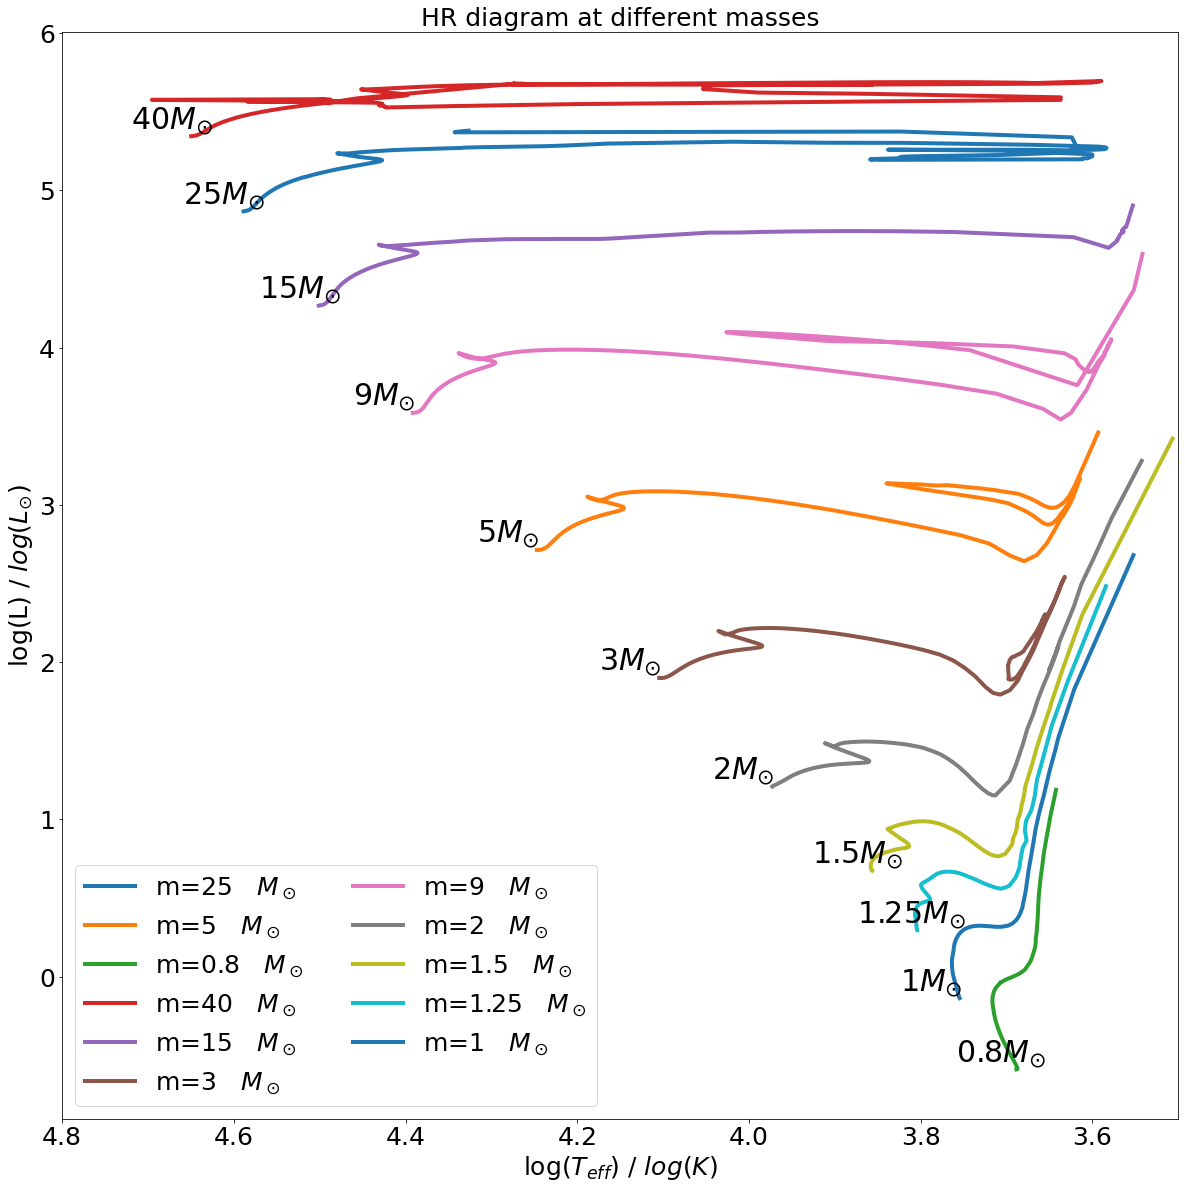

In [39]:
# 3. HR diagram evolution:
plt.figure(figsize=(20,20))
tag = []
Lzams = []
Tzams = []

for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        lgTeff = data[:,4]
        Lz = lgL[0]
        Tz = lgTeff[0]
        tag.append(m+r'$M_{\odot}$')
        label = m+r'$M_{\odot}$'
        Lzams.append(Lz)
        Tzams.append(Tz)
        plt.plot(lgTeff,lgL,linewidth=4,label='m='+m+' '+r' $ \ M_\odot$')
        plt.annotate(label,(Tz,Lz),xytext=(Tz+0.07, Lz+0.05), fontsize=30)
plt.legend(fontsize=25,ncol=2)
plt.title(r'HR diagram at different masses')
plt.xlabel('log($T_{eff}$) / $log(K)$')
plt.ylabel('log(L) / $log(L_{\odot})$')
plt.xlim([3.5,4.8])
plt.gca().invert_xaxis()
plt.savefig(figdir+'HRsolarmass.png',dpi=300)

No handles with labels found to put in legend.


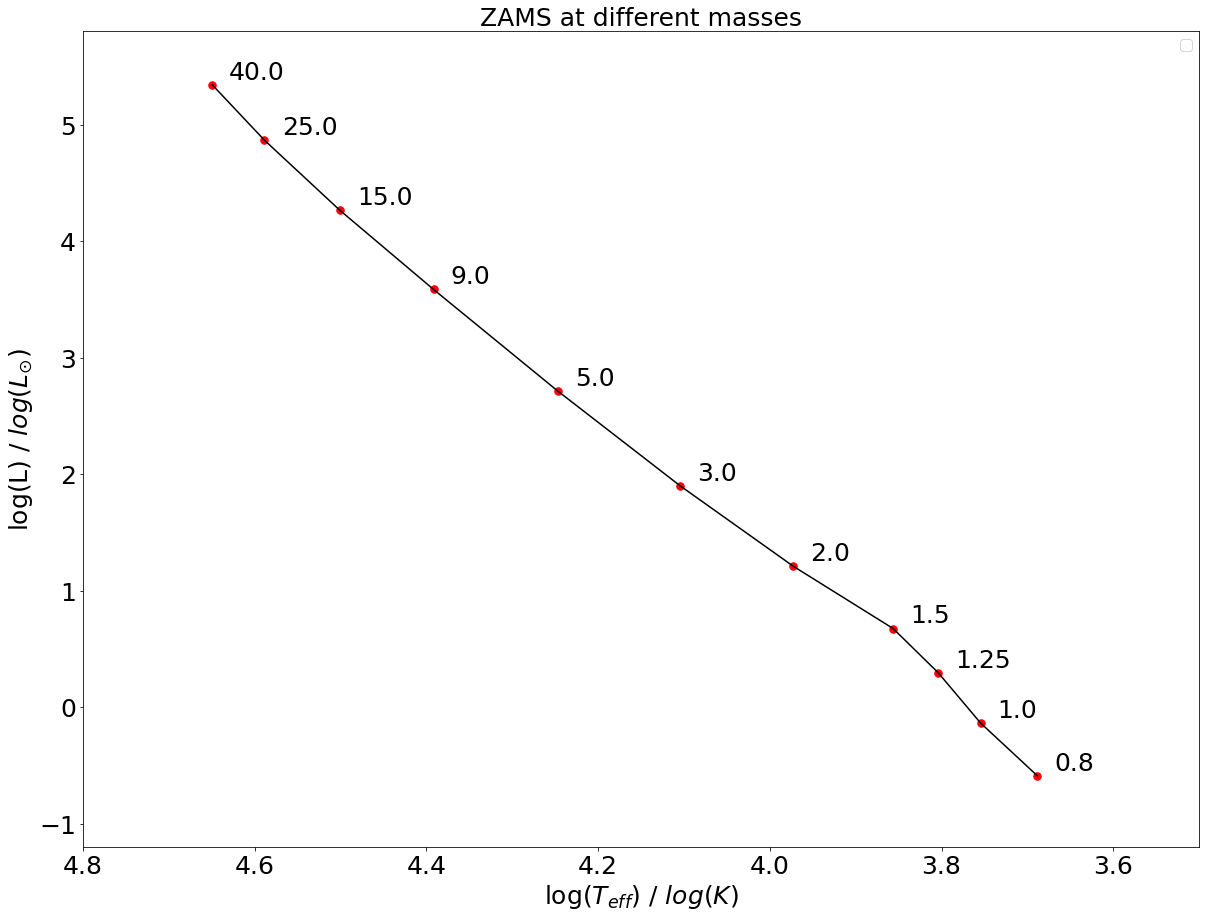

In [76]:
# 4. ZAMS diagram:
plt.figure(figsize=(20,15))
Lzams = []
Tzams = []
tag = []
masses = []
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        Lz = lgL[0]
        lgTeff = data[:,4]
        Tz = lgTeff[0]
        tag.append(m+r'$M_{\odot}$')
        masses.append(m)
        Lzams.append(Lz)
        Tzams.append(Tz)
masses = np.array(masses).astype(float)
masses = np.sort(masses)
Tzams = np.sort(Tzams)
Lzams = np.sort(Lzams)
for i, txt in enumerate(masses):
    plt.annotate(txt, (Tzams[i],Lzams[i]),xytext=(Tzams[i]-0.02, Lzams[i]+0.05))
plt.plot(Tzams,Lzams,'r.',ms=15)
plt.plot(Tzams,Lzams,'k-',ms=10)
plt.legend(fontsize=15,ncol=2)
plt.xlim([3.5,4.8])
plt.ylim([-1.2,5.8])
plt.title(r'ZAMS at different masses')
plt.xlabel('log($T_{eff}$) / $log(K)$')
plt.ylabel('log(L) / $log(L_{\odot})$')
plt.gca().invert_xaxis()
plt.savefig(figdir+'HR_zams.png',dpi=300)


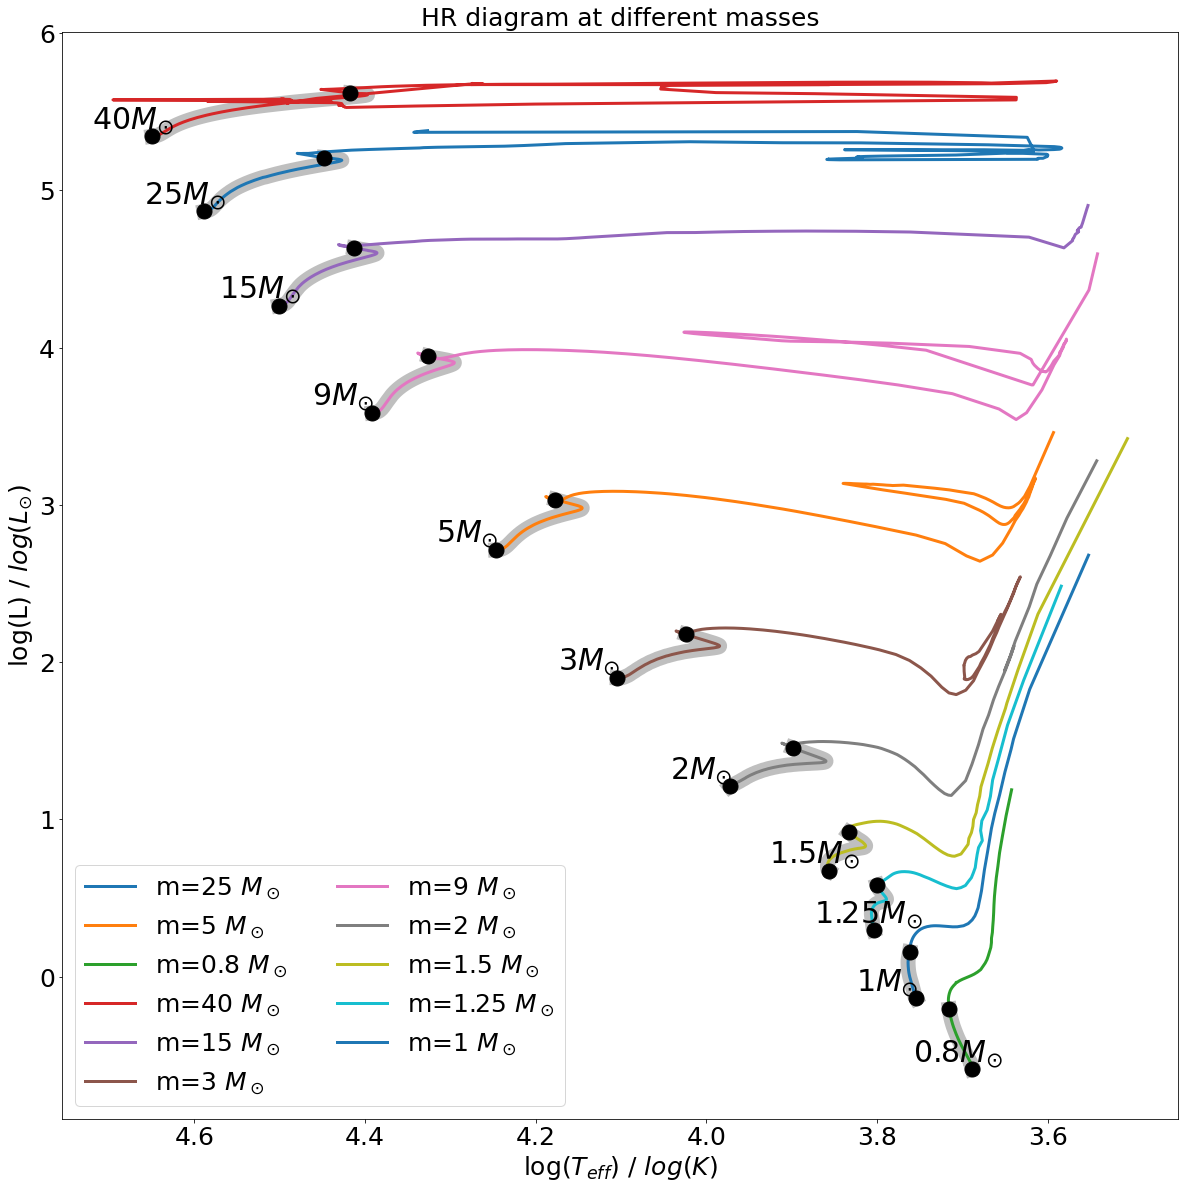

In [77]:
# 4. HR with MS highlighted:
plt.figure(figsize=(20,20))
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        lgTeff = data[:,4]
        Lz = lgL[0]
        Tz = lgTeff[0]
        label = m+r'$M_{\odot}$'
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        Lms = lgL[0:Xminpos]
        Tms = lgTeff[0:Xminpos]
        plt.plot(Tms,Lms,'k-',linewidth=15,alpha=0.25)
        plt.plot(lgTeff,lgL,linewidth=3,label='m='+m+' '+r'$M_\odot$')
        plt.plot(Tms[-1],Lms[-1],'ko',ms=15)
        plt.plot(Tms[0],Lms[0],'ko',ms=15)
        plt.annotate(label,(Tz,Lz),xytext=(Tz+0.07, Lz+0.05), fontsize=30)
plt.legend(fontsize=25,ncol=2)
plt.title(r'HR diagram at different masses')
plt.xlabel('log($T_{eff}$) / $log(K)$')
plt.ylabel('log(L) / $log(L_{\odot})$')
plt.gca().invert_xaxis()
plt.savefig(figdir+'HRsolarmass_ms_highlight.png',dpi=300)

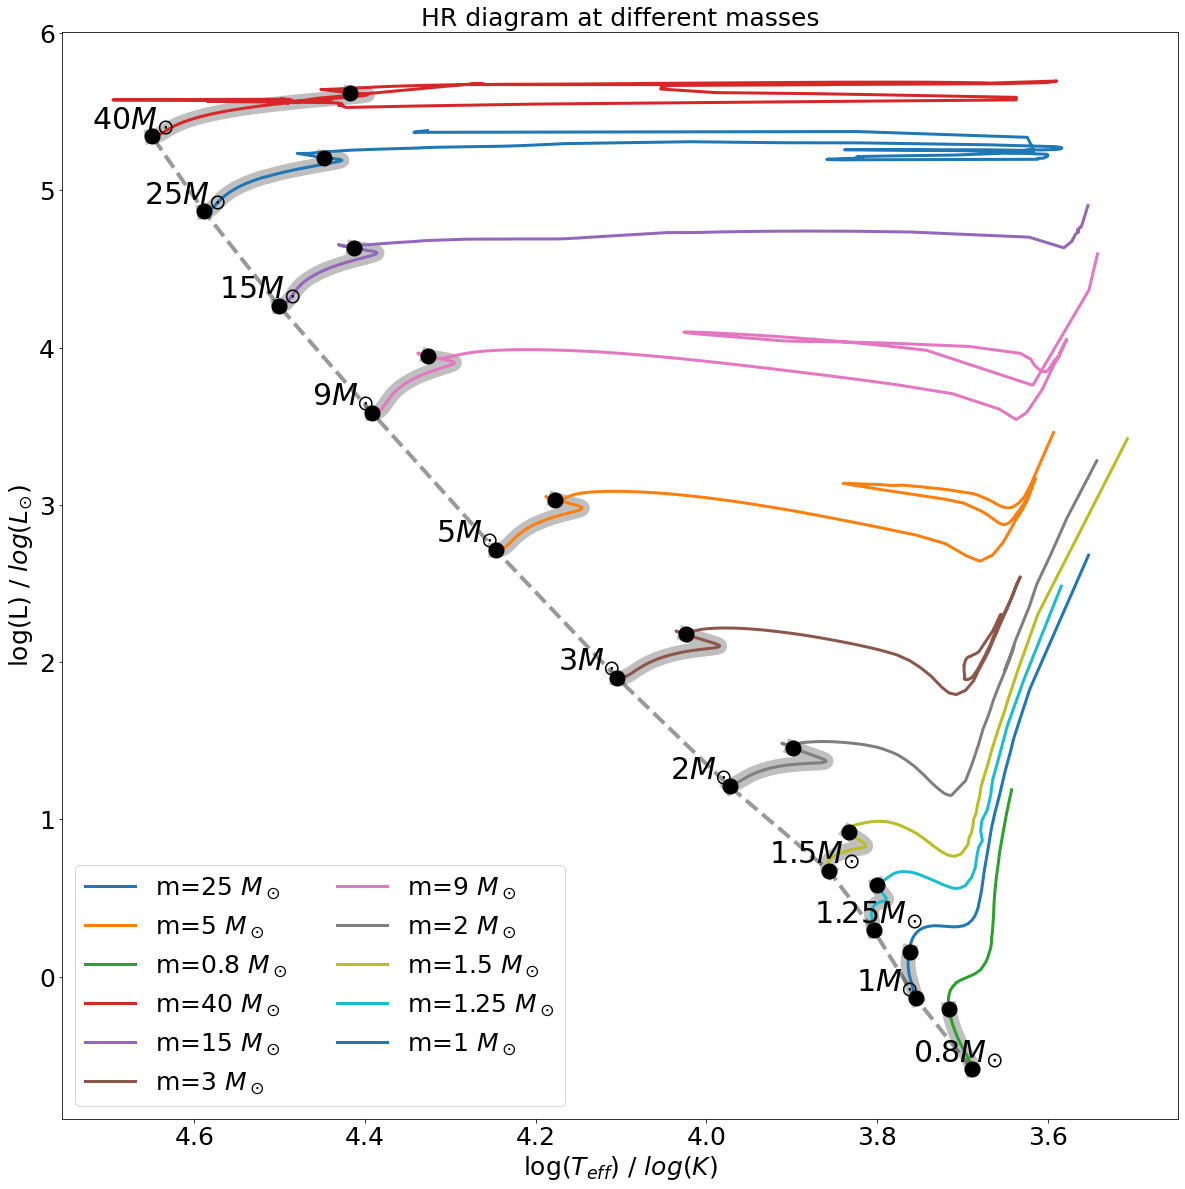

In [112]:
# 4b. HR diagram with ZAMS line indicator:
Lzams = []
Tzams = []
plt.figure(figsize=(20,20))
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        lgTeff = data[:,4]
        Lz = lgL[0]
        Tz = lgTeff[0]
        label = m+r'$M_{\odot}$'
        Xcen = data[:,21]
        Lzams.append(Lz)
        Tzams.append(Tz)
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        Lms = lgL[0:Xminpos]
        Tms = lgTeff[0:Xminpos]
        plt.plot(Tms,Lms,'k-',linewidth=15,alpha=0.25)
        plt.plot(lgTeff,lgL,linewidth=3,label='m='+m+' '+r'$M_\odot$')
        plt.plot(Tms[-1],Lms[-1],'ko',ms=15)
        plt.plot(Tms[0],Lms[0],'ko',ms=15)
        plt.annotate(label,(Tz,Lz),xytext=(Tz+0.07, Lz+0.05), fontsize=30)
        
Tzams = np.sort(Tzams)
Lzams = np.sort(Lzams)
plt.plot(Tzams,Lzams,'k--',linewidth=4,alpha=0.4)
plt.legend(fontsize=25,ncol=2)
plt.title(r'HR diagram at different masses')
plt.xlabel('log($T_{eff}$) / $log(K)$')
plt.ylabel('log(L) / $log(L_{\odot})$')
plt.gca().invert_xaxis()
plt.savefig(figdir+'HRsolarmass_ms_highlight.png',dpi=300)

In [78]:
# 5. Age of stars at ZAMS:
i=0
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        age = data[:,1][0]
        i=i+1
        print(i,'Tzmas =',age,'yrs , '+'M='+m+' Msol')

1 Tzmas = 59734.5415896223 yrs , M=25 Msol
2 Tzmas = 833150.100617788 yrs , M=5 Msol
3 Tzmas = 74783887.0 yrs , M=0.8 Msol
4 Tzmas = 36448.1067198589 yrs , M=40 Msol
5 Tzmas = 117777.499809661 yrs , M=15 Msol
6 Tzmas = 2858858.71879294 yrs , M=3 Msol
7 Tzmas = 249435.367560152 yrs , M=9 Msol
8 Tzmas = 9149774.0222557 yrs , M=2 Msol
9 Tzmas = 15987447.792331 yrs , M=1.5 Msol
10 Tzmas = 27428258.0 yrs , M=1.25 Msol
11 Tzmas = 44870332.0 yrs , M=1 Msol


In [43]:
# 6. Age of stars when leaving MS:
i=0
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        age = data[:,1][Xminpos]
        i=i+1
        print(i,'Tzmas =',age,'yrs , '+'M='+m+' Msol')

1 Tzmas = 6363854.35568967 yrs , M=25 Msol
2 Tzmas = 88995922.4537386 yrs , M=5 Msol
3 Tzmas = 21552716000.0 yrs , M=0.8 Msol
4 Tzmas = 4472534.57502368 yrs , M=40 Msol
5 Tzmas = 11133265.1616882 yrs , M=15 Msol
6 Tzmas = 323213340.244056 yrs , M=3 Msol
7 Tzmas = 26508595.8573733 yrs , M=9 Msol
8 Tzmas = 1017035914.02358 yrs , M=2 Msol
9 Tzmas = 2239183189.22179 yrs , M=1.5 Msol
10 Tzmas = 4232971700.0 yrs , M=1.25 Msol
11 Tzmas = 8525363100.0 yrs , M=1 Msol


No handles with labels found to put in legend.


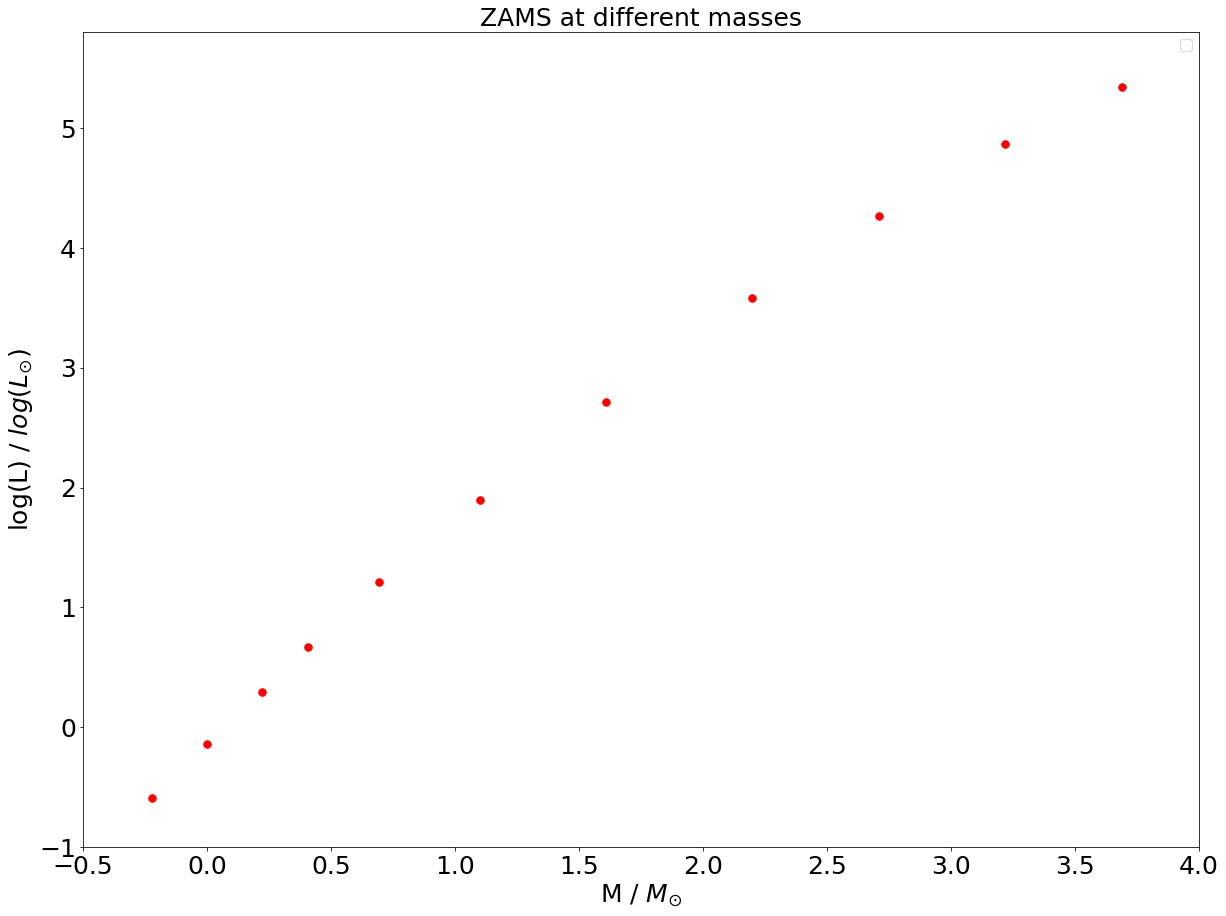

In [122]:
# 7. L-M for stars in ZAMS
plt.figure(figsize=(20,15))
Lzams = []
Mzams = []
masses = []
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        Lz = lgL[0]
        M = data[:,2]
        Mz = M[0]
        masses.append(m)
        Lzams.append(Lz)
        Mzams.append(Mz)
Mzams = np.log(Mzams)
plt.plot(Mzams,Lzams,'r.',ms=15)
plt.legend(fontsize=15,ncol=2)
plt.title(r'ZAMS at different masses')
plt.xlabel('M / $M_{\odot}$')
plt.ylabel('log(L) / $log(L_{\odot})$')
plt.ylim([-1,5.8])
plt.xlim([-0.5,4])
plt.savefig(figdir+'L-M_zams.png',dpi=300)

No handles with labels found to put in legend.


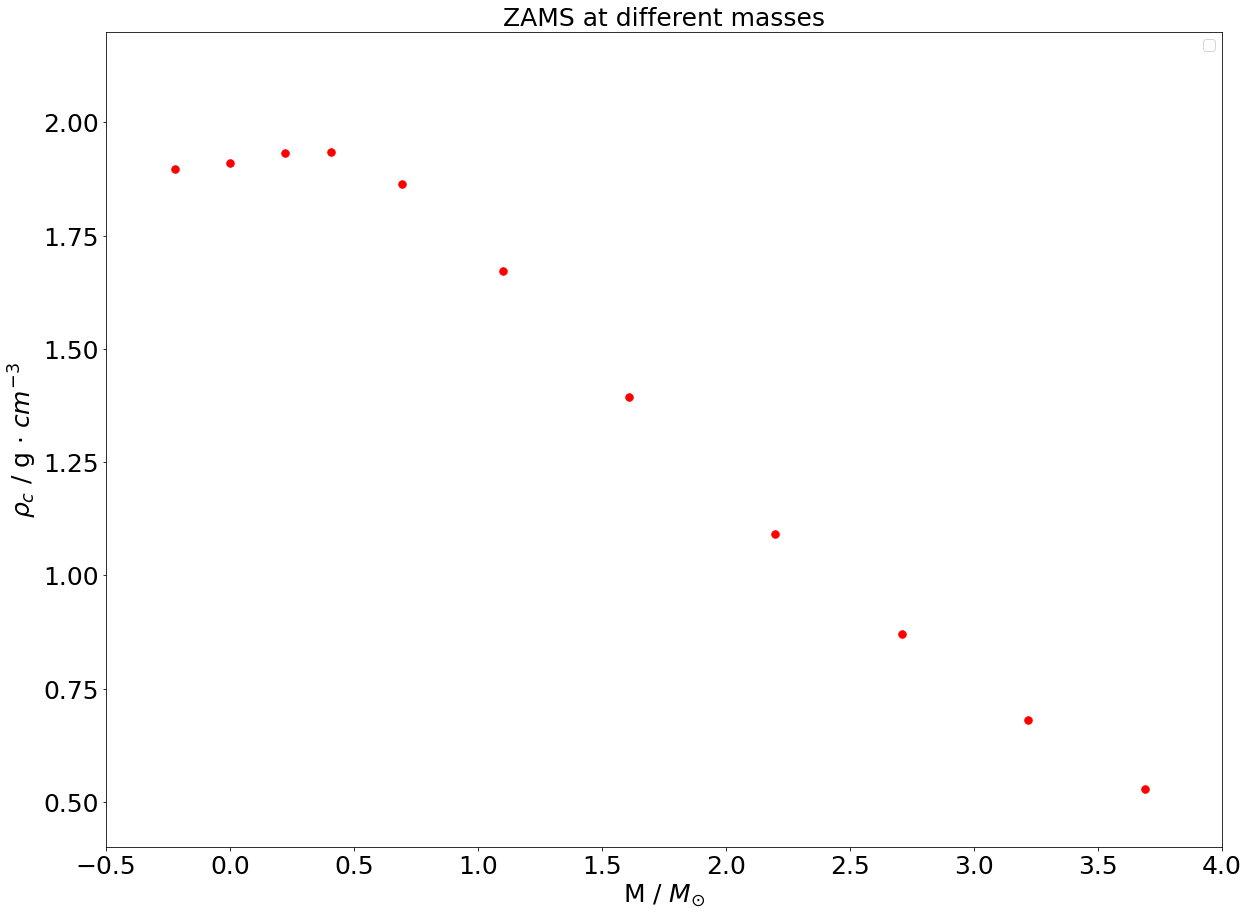

In [88]:
# 8. RHOc-M for stars in ZAMS
plt.figure(figsize=(20,15))
RHOzams = []
Mzams = []
masses = []
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgRHO = data[:,19]
        RHOz = lgRHO[0]
        M = data[:,2]
        Mz = M[0]
        masses.append(m)
        RHOzams.append(RHOz)
        Mzams.append(Mz)
Mzams = np.log(Mzams)
plt.plot(Mzams,RHOzams,'r.',ms=15)
plt.legend(fontsize=15,ncol=2)
plt.title(r'ZAMS at different masses')
plt.xlabel('M / $M_{\odot}$')
plt.ylabel(r'$\rho_c$'+' / g · $cm^{-3}$')
plt.xlim([-0.5,4])
plt.ylim([0.4,2.2])
plt.savefig(figdir+'L-M_zams.png',dpi=300)

No handles with labels found to put in legend.


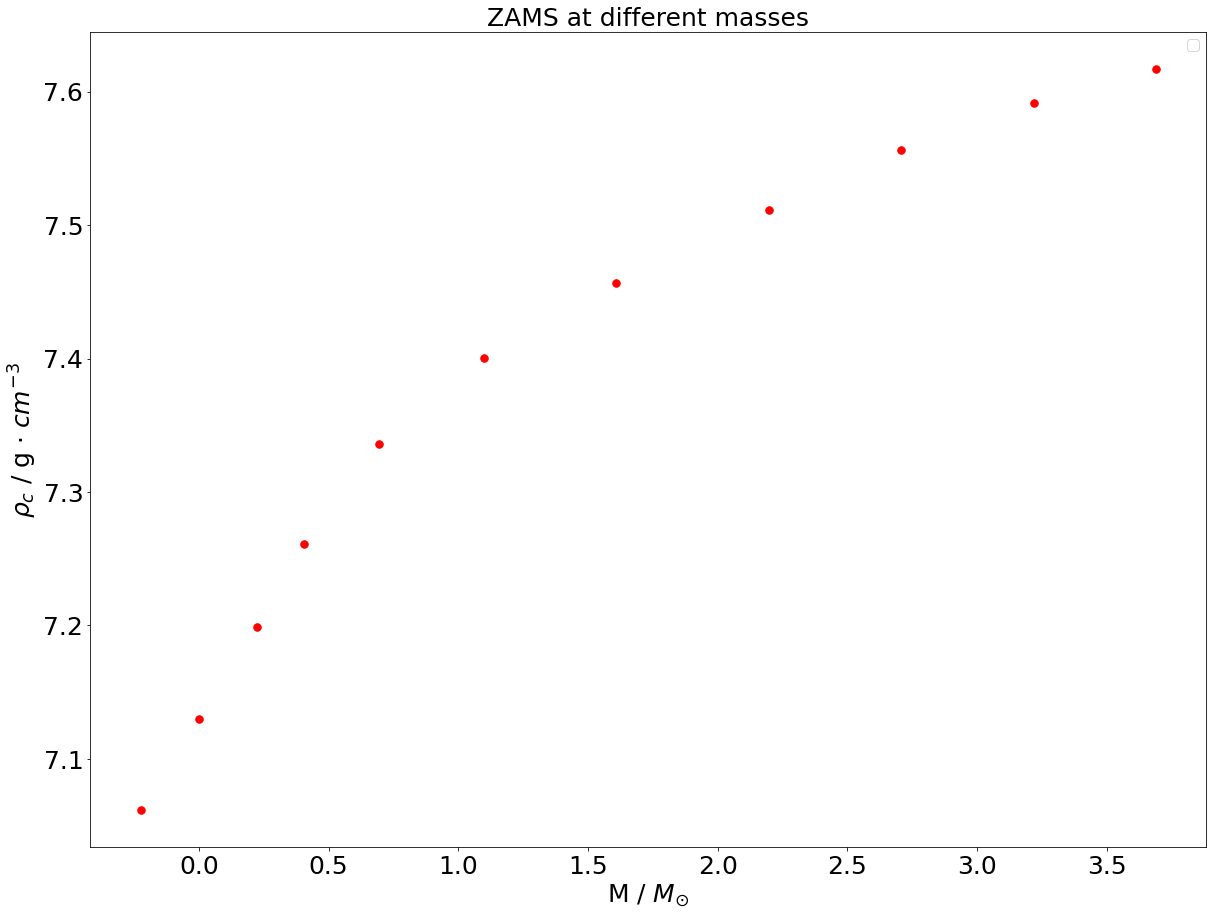

In [91]:
# 9. Tc-M for stars in ZAMS
plt.figure(figsize=(20,15))
Tzams = []
Mzams = []
masses = []
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgTc = data[:,20]
        Tz = lgTc[0]
        M = data[:,2]
        Mz = M[0]
        masses.append(m)
        Tzams.append(Tz)
        Mzams.append(Mz)
Mzams = np.log(Mzams)
plt.plot(Mzams,Tzams,'r.',ms=15)
plt.legend(fontsize=15,ncol=2)
plt.title(r'ZAMS at different masses')
plt.xlabel('M / $M_{\odot}$')
plt.ylabel(r'$\rho_c$'+' / g · $cm^{-3}$')
plt.savefig(figdir+'L-M_zams.png',dpi=300)

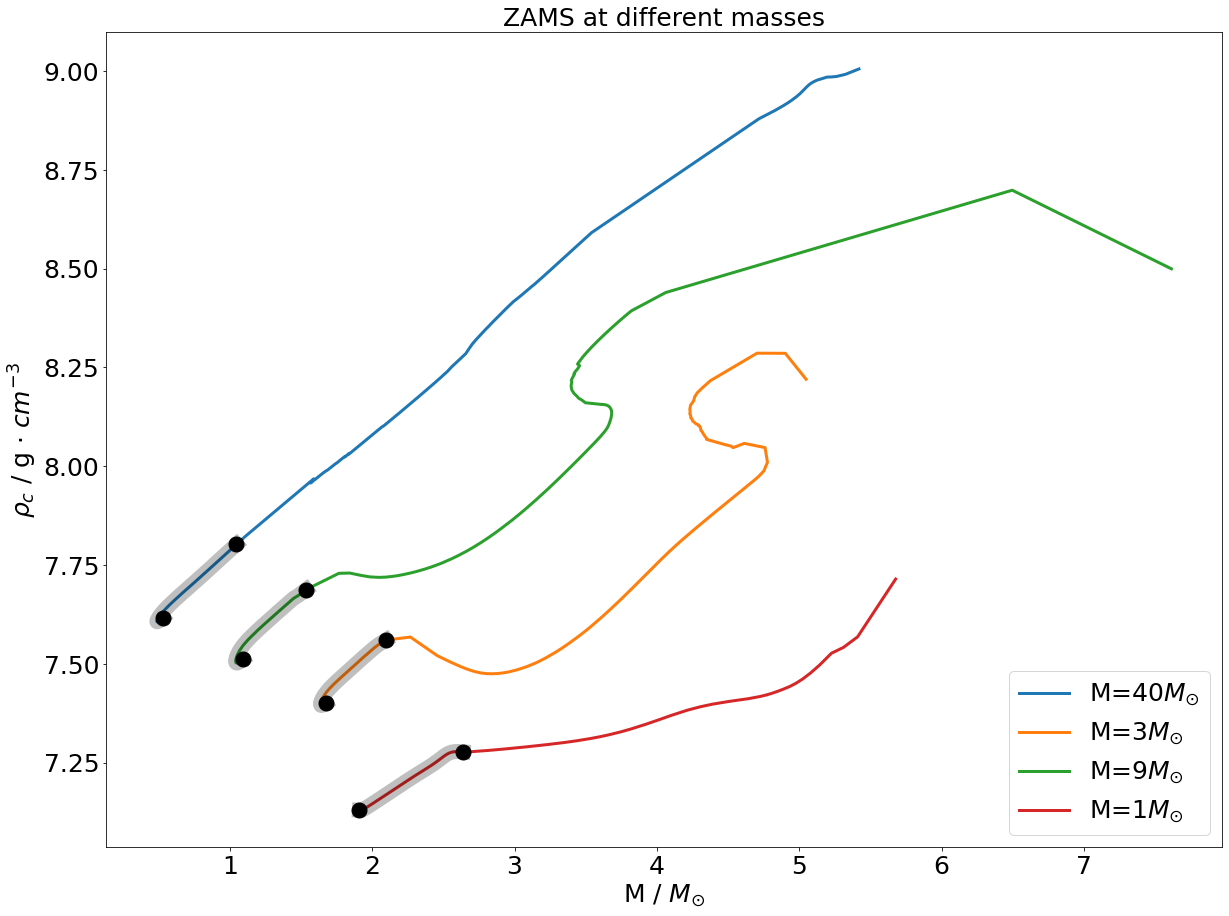

In [105]:
# 9. Tc-M for stars in ZAMS
plt.figure(figsize=(20,15))
for name in files:
    m,v=m_v_name(name)
    if (m=='1' or m=='3' or m=='9' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgTc = data[:,20]
        Tz = lgTc[0]
        RHOc = data[:,19]
        RHOz = RHOc[0]
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        RHOms = RHOc[0:Xminpos]
        lgTcms = lgTc[0:Xminpos]
        plt.plot(RHOc,lgTc,linewidth=3,label='M='+m+'$M_{\odot}$')
        plt.plot(RHOms,lgTcms,'k-',linewidth=15,alpha=0.25)
        plt.plot(RHOms[-1],lgTcms[-1],'ko',ms=15)
        plt.plot(RHOms[0],lgTcms[0],'ko',ms=15)
        
plt.legend(fontsize=25,loc='lower right')
plt.title(r'ZAMS at different masses')
plt.xlabel('M / $M_{\odot}$')
plt.ylabel(r'$\rho_c$'+' / g · $cm^{-3}$')
plt.savefig(figdir+'L-M_zams.png',dpi=300)

[0.5, 2.0, 3.5, 0.5, 2.0, 3.5, 0.5, 2.0, 3.5]
